# Ciência de Dados em Larga Escala
# Trabalho Prático - Performance Analysis
## Lara Sousa e Mariana Serrão

## Notebook 4 - Índice:
- Resumo dos Resultados do Notebook 1 (Dask e Koalas), Notebook 2 (Dask + Modin e Joblib) e Notebook 3 (Rapids)
- Comparação de Desempenho em termos dos tempos de execução
- Observações e conclusões finais.

In [84]:
from datetime import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Lista Completa dos Ficheiros de Resultados

No total existem 9 ficheiros com resultados para cada biblioteca, ou seja, 3 datasets, sendo que cada um tem 3 tipos de dados (completos, filtrados e filtrados com cache). Os resultados em koalas com cache nos datasets com 2 e 3 ficheiros não foram obtidos devido a problemas de memória, assim como no Rapids com cache, no dataset com 3 ficheiros.

In [85]:
# Resultados PySpark (Koalas)
koalas_standard1 = pd.read_parquet('Resultados/koalas_standard1')
koalas_standard2 = pd.read_parquet('Resultados/koalas_standard2')
koalas_standard3 = pd.read_parquet('Resultados/koalas_standard3')
koalas_filtered1 = pd.read_parquet('Resultados/koalas_filtered1')
koalas_filtered2 = pd.read_parquet('Resultados/koalas_filtered2')
koalas_filtered3 = pd.read_parquet('Resultados/koalas_filtered3')
koalas_cache1 = pd.read_parquet('Resultados/koalas_cache1')
#koalas_cache2 = pd.read_parquet('Resultados/koalas_cache2')
#koalas_cache3 = pd.read_parquet('Resultados/koalas_cache3')

# Resultados Dask
dask_standard1 = pd.read_parquet('Resultados/dask_standard1')
dask_standard2 = pd.read_parquet('Resultados/dask_standard2')
dask_standard3 = pd.read_parquet('Resultados/dask_standard3')
dask_filtered1 = pd.read_parquet('Resultados/dask_filtered1')
dask_filtered2 = pd.read_parquet('Resultados/dask_filtered2')
dask_filtered3 = pd.read_parquet('Resultados/dask_filtered3')
dask_cache1 = pd.read_parquet('Resultados/dask_cache1')
dask_cache2 = pd.read_parquet('Resultados/dask_cache2')
dask_cache3 = pd.read_parquet('Resultados/dask_cache3')

# Resultados Modin
modin_standard1 = pd.read_parquet('Resultados/modin_standard1')
modin_standard2 = pd.read_parquet('Resultados/modin_standard2')
modin_standard3 = pd.read_parquet('Resultados/modin_standard3')
modin_filtered1 = pd.read_parquet('Resultados/modin_filtered1')
modin_filtered2 = pd.read_parquet('Resultados/modin_filtered2')
modin_filtered3 = pd.read_parquet('Resultados/modin_filtered3')
modin_cache1 = pd.read_parquet('Resultados/modin_cache1')
modin_cache2 = pd.read_parquet('Resultados/modin_cache2')
modin_cache3 = pd.read_parquet('Resultados/modin_cache3')

# Resultados Joblib
joblib_standard1 = pd.read_parquet('Resultados/joblib_standard1')
joblib_standard2 = pd.read_parquet('Resultados/joblib_standard2')
joblib_standard3 = pd.read_parquet('Resultados/joblib_standard3')
joblib_filtered1 = pd.read_parquet('Resultados/joblib_filtered1')
joblib_filtered2 = pd.read_parquet('Resultados/joblib_filtered2')
joblib_filtered3 = pd.read_parquet('Resultados/joblib_filtered3')
joblib_cache1 = pd.read_parquet('Resultados/joblib_cache1')
joblib_cache2 = pd.read_parquet('Resultados/joblib_cache2')
joblib_cache3 = pd.read_parquet('Resultados/joblib_cache3')

# Resultados rapids
rapids_standard1 = pd.read_parquet('Resultados/rapids_standard1')
rapids_standard2 = pd.read_parquet('Resultados/rapids_standard2')
rapids_standard3 = pd.read_parquet('Resultados/rapids_standard3')
rapids_filtered1 = pd.read_parquet('Resultados/rapids_filtered1')
rapids_filtered2 = pd.read_parquet('Resultados/rapids_filtered2')
rapids_filtered3 = pd.read_parquet('Resultados/rapids_filtered3')
rapids_cache1 = pd.read_parquet('Resultados/rapids_cache1')
rapids_cache2 = pd.read_parquet('Resultados/rapids_cache2')
#rapids_cache3 = pd.read_parquet('Resultados/rapids_cache3')

Devido à forma como os resultados foram guardados, fez-se um mapeamento para fazer equivalência dos nomes equivalentes, por forma a ser possível realizar a concatenação.

In [86]:
# Mapeamento de nomes equivalentes
nome_equivalente = {
    'mean of columns addition': 'mean of sum',
    'mean of columns multiplication': 'mean of product',
    'count_index_length' : 'count index length',
    'standard_deviation' : 'standard deviation',
    'value_counts': 'value counts',
    'complicated_arithmetic_operation': 'complex arithmetic ops',
    'join_count': 'join count',
    'join_data': 'join',
    'groupby_statistics': 'groupby statistics',
    'mean_of_sum' : 'mean of sum',
    'mean_of_product': 'mean of product',
    'sum_columns': 'addition of columns',
    'product_columns': 'multiplication of columns',
    'cache count' : 'count',
    'cache mean': 'mean',
    'cache standard deviation': 'standard deviation',
    'cache mean of columns addition': 'mean of sum',
    'cache addition of columns': 'addition of columns',
    'cache mean of columns multiplication': 'mean of product',
    'cache multiplication of columns': 'multiplication of columns',
    'cache complex arithmetic ops': 'complex arithmetic ops',
    'cache value counts': 'value counts',
    'cache groupby statistics': 'groupby statistics',
    'filtered count' : 'count',
    'filtered mean': 'mean',
    'filtered standard deviation': 'standard deviation',
    'filtered mean of columns addition': 'mean of sum',
    'filtered addition of columns': 'addition of columns',
    'filtered mean of columns multiplication': 'mean of product',
    'filtered multiplication of columns': 'multiplication of columns',
    'filtered complex arithmetic ops': 'complex arithmetic ops',
    'filtered value counts': 'value counts',
    'filtered groupby statistics': 'groupby statistics',
    'cache count index length': 'count index length',
    'filtered mean of complex arithmetic ops': 'mean of complex arithmetic ops',
    'filtered count index length': 'count index length',
    'cache mean of complex arithmetic ops' : 'mean of complex arithmetic ops'
}

def renomear_linhas(df):
    df = df.rename(index=nome_equivalente)
    return df

Renomearam-se todos os ficheiros, através da função `renomar_linhas`.

In [87]:
# Resultados PySpark (Koalas)
koalas_standard1 = renomear_linhas(koalas_standard1)
koalas_standard2 = renomear_linhas(koalas_standard2)
koalas_standard3 = renomear_linhas(koalas_standard3)
koalas_filtered1 = renomear_linhas(koalas_filtered1)
koalas_filtered2 = renomear_linhas(koalas_filtered2)
koalas_filtered3 = renomear_linhas(koalas_filtered3)
koalas_cache1 = renomear_linhas(koalas_cache1)

# Resultados Dask
dask_standard1 = renomear_linhas(dask_standard1)
dask_standard2 = renomear_linhas(dask_standard2)
dask_standard3 = renomear_linhas(dask_standard3)
dask_filtered1 = renomear_linhas(dask_filtered1)
dask_filtered2 = renomear_linhas(dask_filtered2)
dask_filtered3 = renomear_linhas(dask_filtered3)
dask_cache1 = renomear_linhas(dask_cache1)
dask_cache2 = renomear_linhas(dask_cache2)
dask_cache3 = renomear_linhas(dask_cache3)

# Resultados Modin
modin_standard1 = renomear_linhas(modin_standard1)
modin_standard2 = renomear_linhas(modin_standard2)
modin_standard3 = renomear_linhas(modin_standard3)
modin_filtered1 = renomear_linhas(modin_filtered1)
modin_filtered2 = renomear_linhas(modin_filtered2)
modin_filtered3 = renomear_linhas(modin_filtered3)
modin_cache1 = renomear_linhas(modin_cache1)
modin_cache2 = renomear_linhas(modin_cache2)
modin_cache3 = renomear_linhas(modin_cache3)

# Resultados Joblib
joblib_standard1 = renomear_linhas(joblib_standard1)
joblib_standard2 = renomear_linhas(joblib_standard2)
joblib_standard3 = renomear_linhas(joblib_standard3)
joblib_filtered1 = renomear_linhas(joblib_filtered1)
joblib_filtered2 = renomear_linhas(joblib_filtered2)
joblib_filtered3 = renomear_linhas(joblib_filtered3)
joblib_cache1 = renomear_linhas(joblib_cache1)
joblib_cache2 = renomear_linhas(joblib_cache2)
joblib_cache3 = renomear_linhas(joblib_cache3)

# Resultados rapids
rapids_standard1 = renomear_linhas(rapids_standard1)
rapids_standard2 = renomear_linhas(rapids_standard2)
rapids_standard3 = renomear_linhas(rapids_standard3)
rapids_filtered1 = renomear_linhas(rapids_filtered1)
rapids_filtered2 = renomear_linhas(rapids_filtered2)
rapids_filtered3 = renomear_linhas(rapids_filtered3)
rapids_cache1 = renomear_linhas(rapids_cache1)
rapids_cache2 = renomear_linhas(rapids_cache2)


## Resumo Geral

Numa primeira fase, por forma a fazer um resumo geral dos resultados obtidos, concatenaram-se todos os resultados num dataframe `resultados_total`.

In [88]:
import pandas as pd

# Lista de todos os DataFrames
dfs = [
    koalas_standard1['duration'], koalas_standard2['duration'], koalas_standard3['duration'],
    koalas_filtered1['duration'], koalas_filtered2['duration'], koalas_filtered3['duration'],
    koalas_cache1['duration'],
    dask_standard1['duration'], dask_standard2['duration'], dask_standard3['duration'],
    dask_filtered1['duration'], dask_filtered2['duration'], dask_filtered3['duration'],
    dask_cache1['duration'], dask_cache2['duration'], dask_cache3['duration'],
    modin_standard1['duration'], modin_standard2['duration'], modin_standard3['duration'],
    modin_filtered1['duration'], modin_filtered2['duration'], modin_filtered3['duration'],
    modin_cache1['duration'], modin_cache2['duration'], modin_cache3['duration'],
    joblib_standard1['duration'], joblib_standard2['duration'], joblib_standard3['duration'],
    joblib_filtered1['duration'], joblib_filtered2['duration'], joblib_filtered3['duration'],
    joblib_cache1['duration'], joblib_cache2['duration'], joblib_cache3['duration'],
    rapids_standard1['duration'], rapids_standard2['duration'], rapids_standard3['duration'],
    rapids_filtered1['duration'], rapids_filtered2['duration'], rapids_filtered3['duration'],
    rapids_cache1['duration'], rapids_cache2['duration']
]
# Lista de rótulos para os DataFrames
labels = [
    'Koalas_standard1', 'Koalas_standard2', 'Koalas_standard3',
    'Koalas_filtered1', 'Koalas_filtered2', 'Koalas_filtered3',
    'Koalas_cache1',
    'Dask_standard1', 'Dask_standard2', 'Dask_standard3',
    'Dask_filtered1', 'Dask_filtered2', 'Dask_filtered3',
    'Dask_cache1', 'Dask_cache2', 'Dask_cache3',
    'Modin_standard1', 'Modin_standard2', 'Modin_standard3',
    'Modin_filtered1', 'Modin_filtered2', 'Modin_filtered3',
    'Modin_cache1', 'Modin_cache2', 'Modin_cache3',
    'Joblib_standard1', 'Joblib_standard2', 'Joblib_standard3',
    'Joblib_filtered1', 'Joblib_filtered2', 'Joblib_filtered3',
    'Joblib_cache1', 'Joblib_cache2', 'Joblib_cache3',
    'Rapids_standard1', 'Rapids_standard2', 'Rapids_standard3',
    'Rapids_filtered1', 'Rapids_filtered2', 'Rapids_filtered3',
    'Rapids_cache1', 'Rapids_cache2'
]

# Criar um DataFrame único com os resultados
resultados_total = pd.concat(dfs, axis=1, keys=labels)

# Visualizar o DataFrame
resultados_total

,Koalas_standard1,Koalas_standard2,Koalas_standard3,Koalas_filtered1,Koalas_filtered2,Koalas_filtered3,Koalas_cache1,Dask_standard1,Dask_standard2,Dask_standard3,...,Joblib_cache2,Joblib_cache3,Rapids_standard1,Rapids_standard2,Rapids_standard3,Rapids_filtered1,Rapids_filtered2,Rapids_filtered3,Rapids_cache1,Rapids_cache2
task,,,,,,,,,,,,,,,,,,,,,
read file,0.172114,NaN,NaN,0.133426,NaN,NaN,0.134933,0.007313,NaN,NaN,...,NaN,NaN,0.023917,NaN,NaN,0.018417,NaN,NaN,0.026399,NaN
count,0.188165,0.076111,0.084085,0.408928,0.059062,0.068141,0.063100,14.161976,15.899789,17.269861,...,0.000007,0.000006,3.308708,2.384489,3.725190,1.294356,2.499300,3.409777,0.021666,0.035059
count index length,0.092255,0.067612,0.053652,0.301121,0.052356,0.055578,0.049356,14.075137,16.248594,17.446398,...,0.000003,0.000003,1.114895,2.190547,3.487336,1.172549,2.423107,3.430728,0.023325,0.030143
mean,0.326843,0.248294,0.282358,0.543700,0.269238,0.288670,0.116151,14.178173,16.162987,17.639087,...,0.008056,0.012968,1.175740,2.106889,3.390609,1.212871,2.631595,3.510671,0.061143,0.065241
standard deviation,0.411885,0.361840,0.362486,0.545043,0.333123,0.364278,0.101004,14.063892,16.277905,17.028288,...,0.028883,0.045954,1.382593,2.391401,3.607480,1.197493,2.556513,3.755699,0.115181,0.073062
mean of sum,0.504825,0.482418,0.434980,0.659849,0.396748,0.419480,0.180650,13.929075,16.010783,17.114664,...,0.016186,0.024913,1.495230,2.508220,3.481357,1.190078,2.522065,3.793947,0.077673,0.070235
mean of product,0.529478,0.472169,0.523413,0.553495,0.393968,0.535474,0.128458,14.220426,16.159388,17.099322,...,0.015823,0.024718,6.083744,2.281153,4.049202,1.218393,2.287519,3.417218,0.062916,0.083183
value counts,1.412496,1.193259,1.361079,0.849900,1.113561,1.184319,0.305910,14.519860,16.067794,17.471002,...,0.042732,0.066761,1.289654,2.256943,3.160328,1.597991,4.333574,3.383961,0.085757,0.080885
mean of complex arithmetic ops,6.101567,6.357684,NaN,3.864372,6.367603,NaN,1.783648,15.269703,17.784827,18.793306,...,NaN,NaN,2.203331,2.492820,3.753811,1.598518,2.535004,4.290886,0.530249,0.284203


#### Boxplot do Tempo de Execução por Operação

Realizou-se um gráfico boxplot, por forma a visualizar a distribuição dos tempos de execução para diferentes operações e bibliotecas. Este tipo de gráfico permite uma análise comparativa dos tempos de execução, destacando medidas estatísticas como medianas, quartis e outliers em cada conjunto de dados. Através da análise dos boxplots, é possível identificar padrões de desempenho, variações extremas e tendências gerais em relação ao tempo de execução das operações em cada biblioteca.

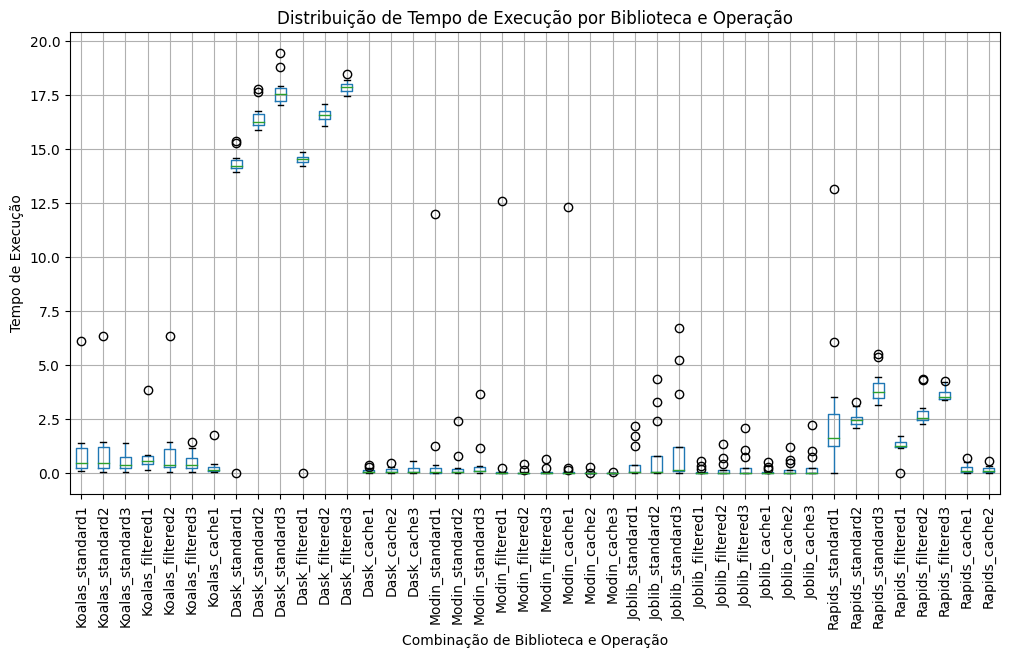

In [89]:
import matplotlib.pyplot as plt

# Boxplot de tempo de execução por biblioteca e operação
plt.figure(figsize=(12, 6))
resultados_total.boxplot(column=labels, rot=90)
plt.title('Distribuição de Tempo de Execução por Biblioteca e Operação')
plt.xlabel('Combinação de Biblioteca e Operação')
plt.ylabel('Tempo de Execução')
plt.show()

**Observações:**

É possível observar que todas as bibliotecas apresentam uma grande variação nos tempos de execução, evidenciada pela presença de muitos outliers nos boxplots. Esta variação pode indicar que o desempenho das operações pode ser altamente dependente do tipo de dado, da operação realizada e do contexto específico de uso.

A biblioteca Dask, embora apresente tempos de execução consistentemente mais altos, também exibe uma menor variabilidade, o que sugere um desempenho mais previsível, embora mais lento em média. Por outro lado, Rapids destaca-se por tempos de execução consistentemente baixos e menor variabilidade, indicando um desempenho rápido e confiável.

É evidente que o uso de cache melhora significativamente o desempenho em todas as bibliotecas, reduzindo os tempos de execução e a variabilidade. Além disso, operações em conjuntos de dados filtrados geralmente resultam em tempos de execução mais baixos em comparação com conjuntos de dados não filtrados, independentemente da biblioteca utilizada.

A maioria das bibliotecas mostra um aumento nos tempos de execução à medida que o número de arquivos Parquet aumenta, o que sugere que o desempenho pode ser sensível ao tamanho do conjunto de dados e à complexidade da operação realizada.

### Duração média de cada tarefa

Realizaram-se dois gráficos, um de barras e outro de pizza, para analisar os tempos médios de execução por tarefa. No gráfico de barras, cada barra representa uma operação, enquanto que a sua altura indica o tempo médio de execução. Já no gráfico de pizza, cada fatia representa uma operação, com a percentagem de tempo médio de execução correspondente exibida. AMbos os gráficos fornecem uma visão geral do tempo médio gasto em cada operação, permitindo a identificação das tarefas mais demoradas em relação às outras.

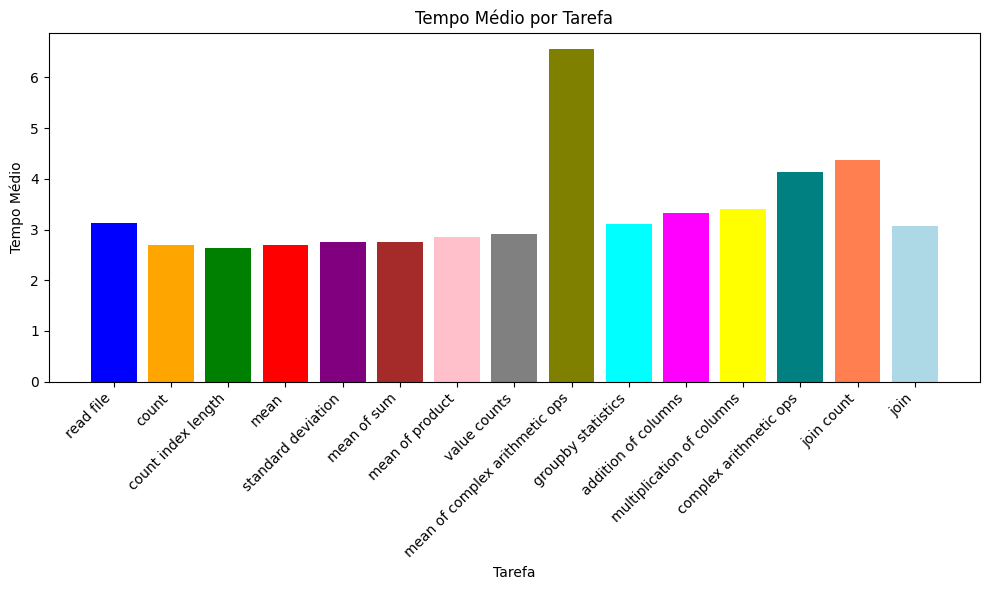

In [90]:
# Calculando a média dos tempos para cada operação
mean_times = resultados_total.mean(axis=1)

# Criando um novo DataFrame com as médias
resultados_total_media = pd.DataFrame(mean_times, columns=['Tempo Médio'])

# Supondo que 'resultados_total_media' seja o nome do DataFrame
tasks = resultados_total_media.index.tolist()
tempos = resultados_total_media['Tempo Médio'].tolist()

# Cores diferentes para cada barra
cores = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 
         'magenta', 'yellow', 'teal', 'coral', 'lightblue']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tasks, tempos, color=cores)

# Adicionando título e rótulos aos eixos
plt.title('Tempo Médio por Tarefa')
plt.xlabel('Tarefa')
plt.ylabel('Tempo Médio')

# Rotacionando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

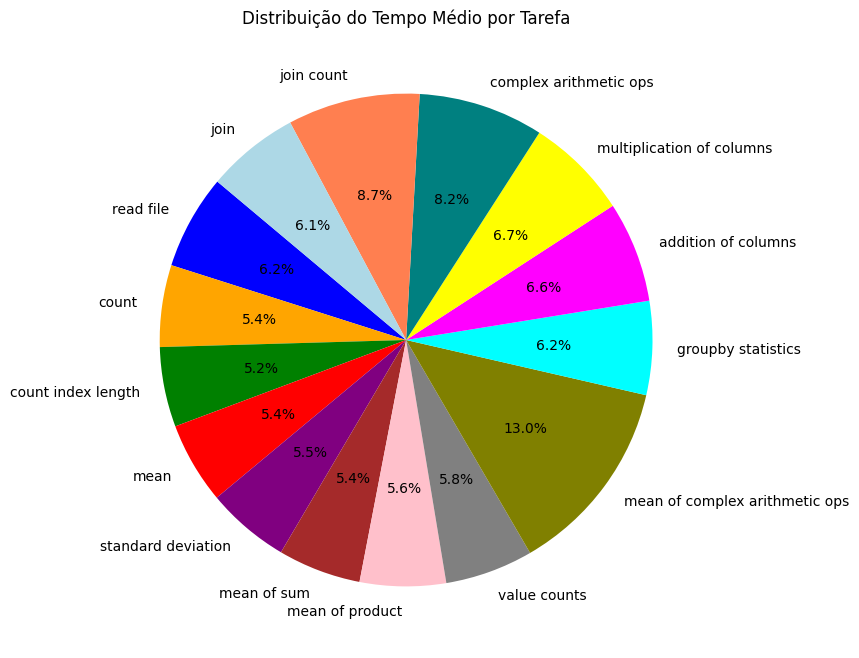

In [91]:
import matplotlib.pyplot as plt

# Dados do DataFrame
tasks = resultados_total_media.index.tolist()
tempos = resultados_total_media['Tempo Médio'].tolist()

# Cores diferentes para cada fatia do gráfico de pizza
cores = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 
         'magenta', 'yellow', 'teal', 'coral', 'lightblue']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(tempos, labels=tasks, colors=cores, autopct='%1.1f%%', startangle=140)

# Adicionando título
plt.title('Distribuição do Tempo Médio por Tarefa')

# Mostrando o gráfico
plt.show()

**Observações:**

Analisando o tempo médio por tarefa é possível verificar que, de forma geral, a operação que demora mais tempo é a média de operações aritmétcias complexas (`mean of comples arithmetic ops`), demorando em média cerca de 6 segundos. A operação mais rápida foi a `count index length`.

## Comparação das bibliotecas

Por forma a comparar as bibliotecas, foi realizada a concatenação dos resultados padrão para as cinco bibliotecas: Koalas, Dask, Modin, Joblib e Rapids. Cada conjunto de dados resultante contém as durações das operações para cada biblioteca em formato dataframe, facilitando a comparação lado a lado. Os DataFrames concatenados exibem o tempo de execução de cada operação para cada biblioteca, permitindo uma análise direta das diferenças de desempenho entre elas.

Adicionalmente, foram criados dois gráficos para cada conjunto de dados: um gráfico de barras mostrando a média das durações para cada biblioteca e outro gráfico de barras empilhadas mostrando o total das durações por operação para cada biblioteca.

Em seguida, este processo foi repetido para os dados filtados e os filtrados com cache e, novamente, para os datasets com dois e três ficheiros.

### 1 Ficheiro

#### Dados Completos

In [92]:
# Concatenando os resultados padrão para as cinco bibliotecas
resultados_standard_concatenado = pd.concat([
    koalas_standard1['duration'], dask_standard1['duration'], modin_standard1['duration'], joblib_standard1['duration'], rapids_standard1['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados padrão
print("Número de linhas:", resultados_standard_concatenado.shape[0])
print("Resultados em Dados Completos:")
resultados_standard_concatenado

Número de linhas: 15
Resultados em Dados Completos:


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
read file,0.172114,0.007313,12.005632,NaN,0.023917
count,0.188165,14.161976,0.000021,0.000016,3.308708
count index length,0.092255,14.075137,0.000002,0.000002,1.114895
mean,0.326843,14.178173,0.022789,0.021115,1.175740
standard deviation,0.411885,14.063892,0.080309,0.075192,1.382593
mean of sum,0.504825,13.929075,0.039618,0.040608,1.495230
mean of product,0.529478,14.220426,0.039597,0.041845,6.083744
value counts,1.412496,14.519860,0.173200,0.117225,1.289654
mean of complex arithmetic ops,6.101567,15.269703,NaN,NaN,2.203331


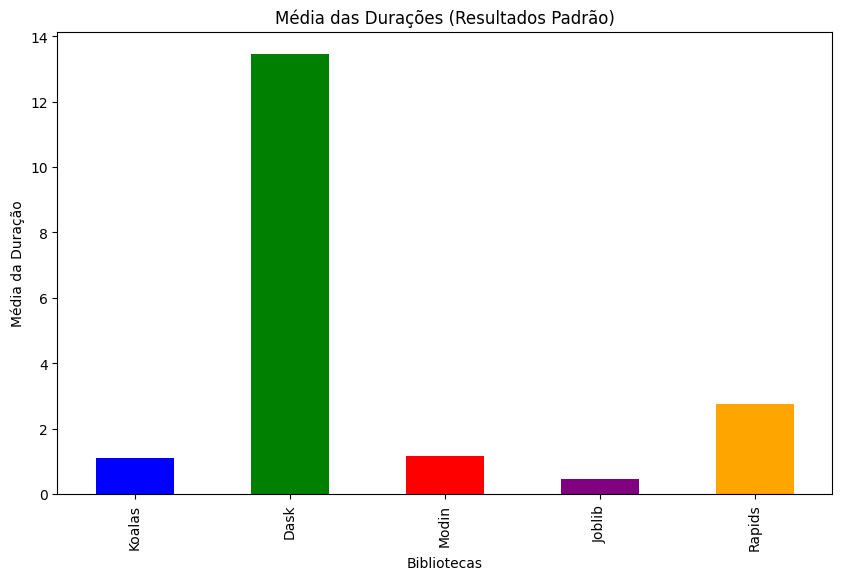

In [93]:
# Calcular a média das durações (ou pode usar a soma se preferir)
mean_durations_standard = resultados_standard_concatenado.mean()

# Lista de cores para as barras
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Gráfico de barras para resultados padrão com cores diferentes
plt.figure(figsize=(10, 6))
mean_durations_standard.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados Padrão)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

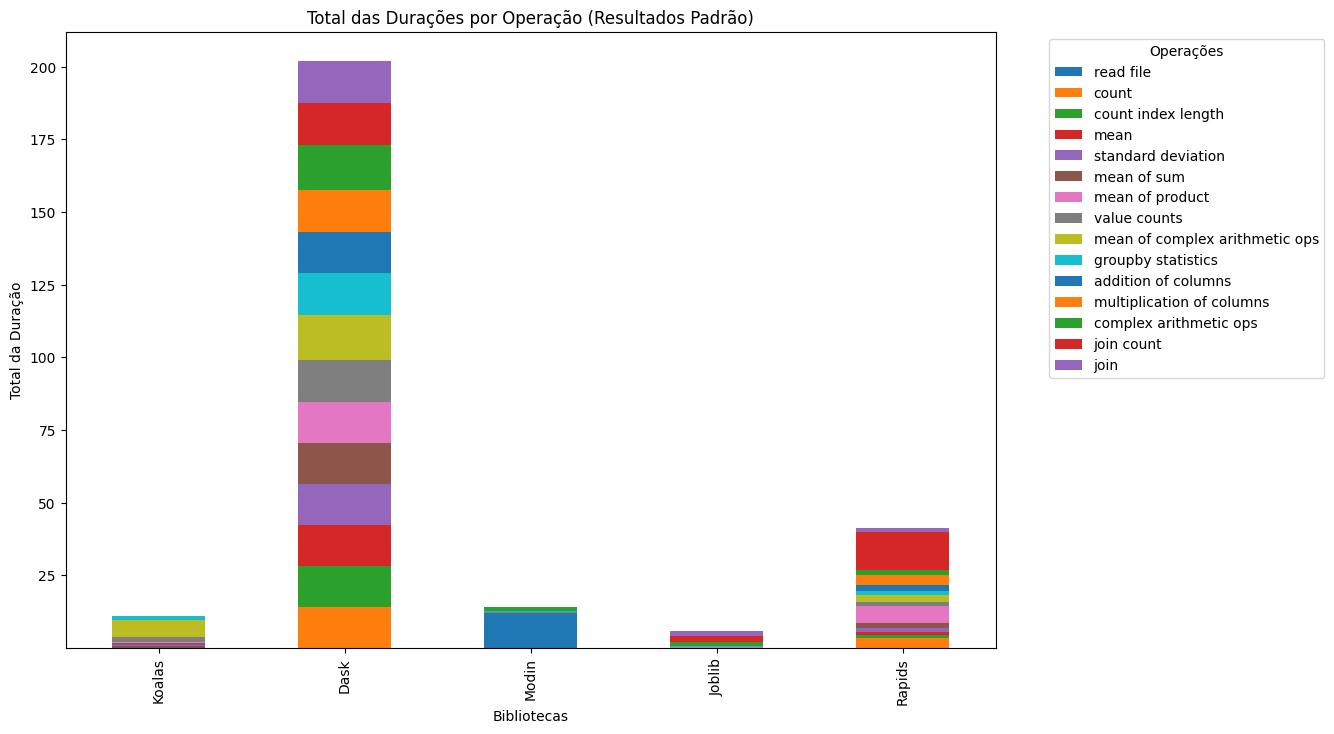

In [94]:
# Gráfico de barras empilhadas para resultados padrão
resultados_standard_concatenado.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados Padrão)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Para dados completos do dataset com 1 ficheiro, é possível observar que a biblioteca Joblib é a que apresenta menor média de tempos de execução, seguida da biblioteca Koalas, sendo que a biblioteca Dask é a mais demorada. Em termos de tempo total de operação, observa-se que a maior parte do tempo total do modin deve-se à operação `read file` e no Rapids à operação `join count`.

#### Dados Filtrados

In [95]:
# Concatenando os resultados filtrados para as cinco bibliotecas
resultados_filtered_concatenado = pd.concat([
    koalas_filtered1['duration'], dask_filtered1['duration'], modin_filtered1['duration'], joblib_filtered1['duration'], rapids_filtered1['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados filtrados
print("Número de linhas:", resultados_filtered_concatenado.shape[0])
print("Resultados em Dados Filtrados:")
resultados_filtered_concatenado

Número de linhas: 15
Resultados em Dados Filtrados:


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
read file,0.133426,0.006736,12.610538,NaN,0.018417
count,0.408928,14.474323,0.000018,0.000011,1.294356
count index length,0.301121,14.530146,0.000002,0.000004,1.172549
mean,0.543700,14.427309,0.004962,0.004892,1.212871
standard deviation,0.545043,14.577304,0.012814,0.012113,1.197493
mean of sum,0.659849,14.658457,0.010246,0.007327,1.190078
mean of product,0.553495,14.247474,0.006473,0.006770,1.218393
mean of complex arithmetic ops,3.864372,14.546414,NaN,NaN,1.598518
value counts,0.849900,14.423734,0.022228,0.020979,1.597991


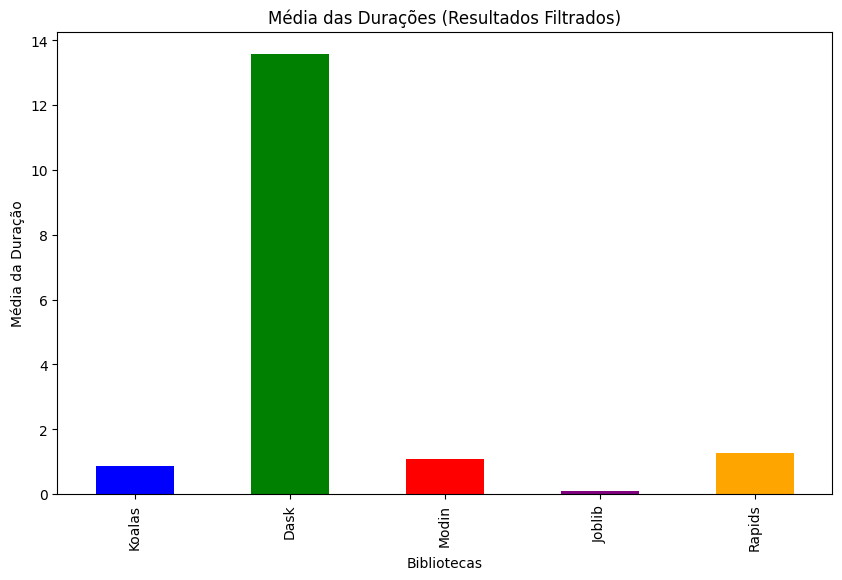

In [96]:
# Resultados filtrados
mean_durations_filtered = resultados_filtered_concatenado.mean()
plt.figure(figsize=(10, 6))
mean_durations_filtered.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados Filtrados)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

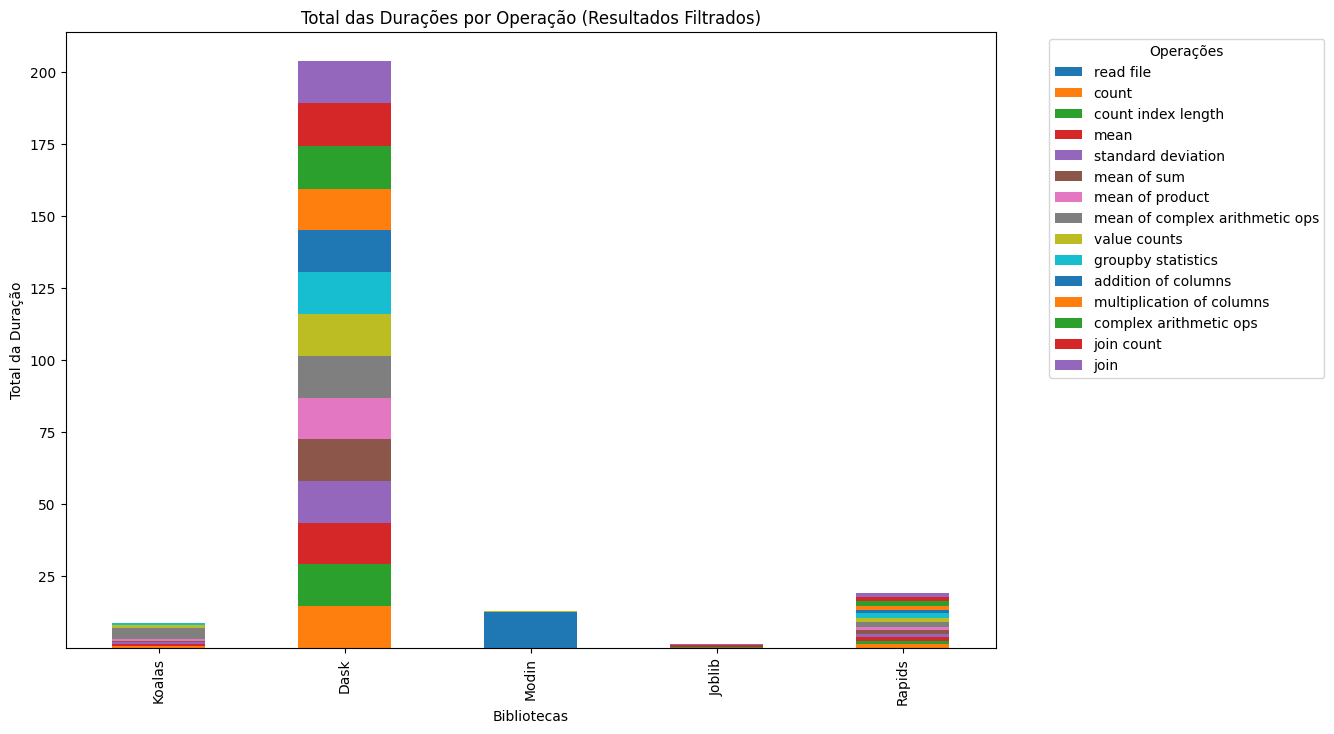

In [97]:
# Gráfico de barras empilhadas para resultados filtrados
resultados_filtered_concatenado.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados Filtrados)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Para dados filtrados do dataset com 1 ficheiro, observa-se que a biblioteca Joblib continua a apresentar a menor média de tempos de execução, seguida pela Koalas, enquanto Dask mantém sua posição como a mais demorada. Em relação ao tempo total de operação, nota-se que a maior parte do tempo total do Modin é consumida pela operação `read file`, enquanto no Rapids é pela operação `join count`.

#### Dados Filtrados com Cache

In [98]:
# Concatenando os resultados em cache para as cinco bibliotecas
resultados_cache_concatenado = pd.concat([
    koalas_cache1['duration'], dask_cache1['duration'], modin_cache1['duration'], joblib_cache1['duration'], rapids_cache1['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados em cache
print("Número de linhas:", resultados_cache_concatenado.shape[0])
print("Resultados em Dados Filtrados com Cache:")
resultados_cache_concatenado

Número de linhas: 15
Resultados em Dados Filtrados com Cache:


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
read file,0.134933,0.006319,12.339037,NaN,0.026399
count,0.063100,0.013732,0.240755,0.000014,0.021666
count index length,0.049356,0.019761,0.029568,0.000002,0.023325
mean,0.116151,0.040509,0.004515,0.004227,0.061143
standard deviation,0.101004,0.048017,0.004265,0.010915,0.115181
mean of sum,0.180650,0.036645,0.003512,0.006576,0.077673
mean of product,0.128458,0.042680,0.003803,0.006163,0.062916
value counts,0.305910,0.041203,0.001244,0.019618,0.085757
mean of complex arithmetic ops,1.783648,0.287676,NaN,NaN,0.530249


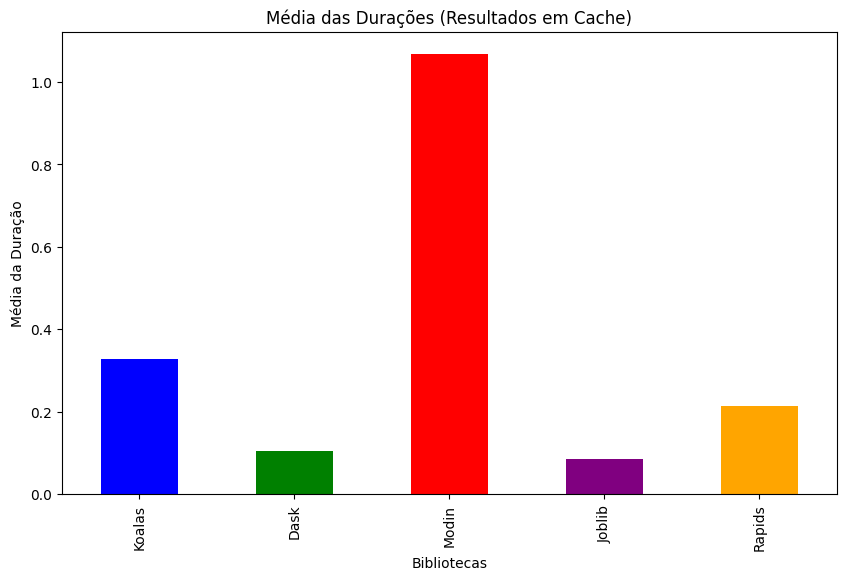

In [99]:
# Resultados em cache
mean_durations_cache = resultados_cache_concatenado.mean()
plt.figure(figsize=(10, 6))
mean_durations_cache.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados em Cache)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

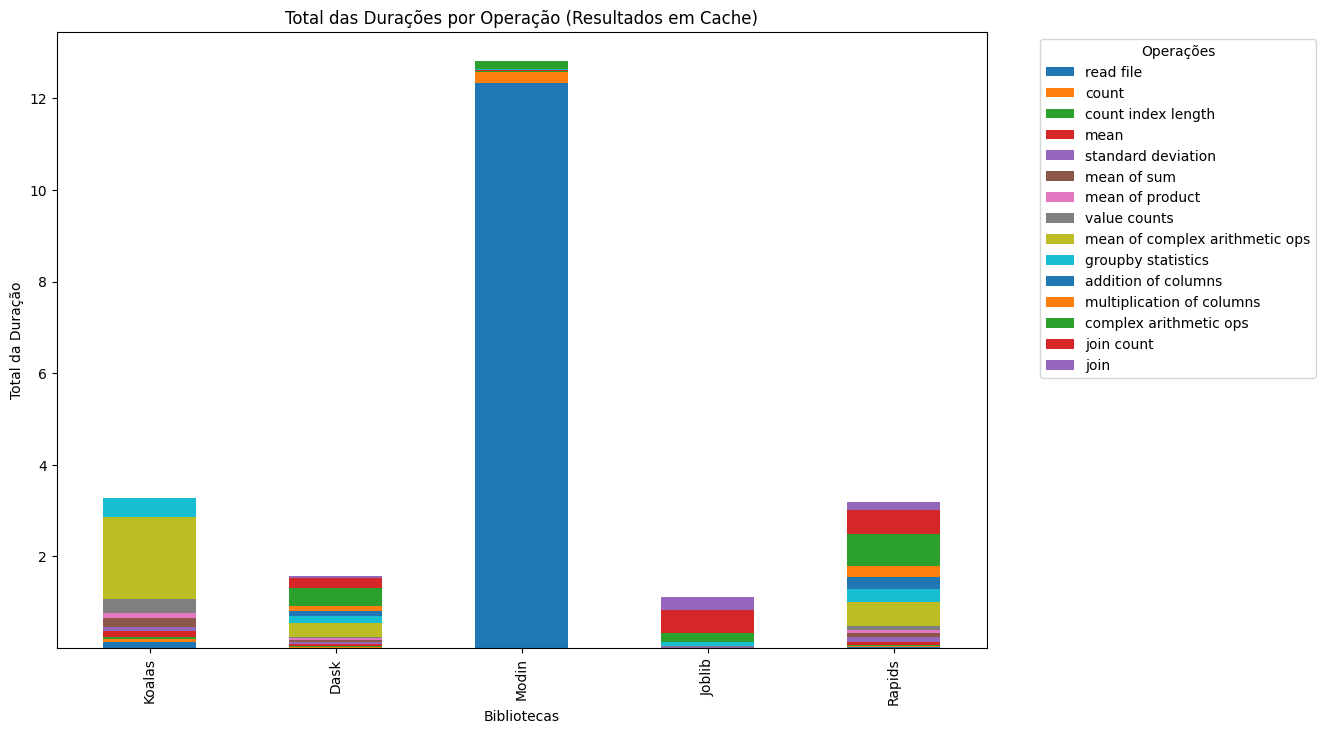

In [100]:
# Gráfico de barras empilhadas para resultados em cache
resultados_cache_concatenado.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados em Cache)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Nos dados filtrados com cache do dataset com 1 ficheiro, observamos que a biblioteca Joblib continua a ser a mais rápida, seguida por Dask, enquanto Modin é agora identificada como a mais lenta. Assim, é possível verificar que, com a inserção da cache, o dask apresentou uma melhoria. Em relação ao tempo total de operação, notamos uma significativa discrepância no tempo de execução do Koalas na operação `mean of complex arithmetic ops`, enquanto no Modin é pela operação `read file`.

### 2 Ficheiros

#### Dados Completos

In [101]:
# Concatenando os resultados padrão para as cinco bibliotecas (conjunto 2)
resultados_standard_concatenado2 = pd.concat([
    koalas_standard2['duration'], dask_standard2['duration'], modin_standard2['duration'], joblib_standard2['duration'], rapids_standard2['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados padrão (conjunto 2)
print("Número de linhas:", resultados_standard_concatenado2.shape[0])
print("Resultados em Dados Completos (Conjunto 2):")
resultados_standard_concatenado2

Número de linhas: 14
Resultados em Dados Completos (Conjunto 2):


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
count,0.076111,15.899789,0.000018,0.000016,2.384489
count index length,0.067612,16.248594,0.000001,0.000003,2.190547
mean,0.248294,16.162987,0.043701,0.040197,2.106889
standard deviation,0.361840,16.277905,0.152174,0.136914,2.391401
mean of sum,0.482418,16.010783,0.081636,0.073323,2.508220
mean of product,0.472169,16.159388,0.079379,0.079523,2.281153
value counts,1.193259,16.067794,0.219047,0.215440,2.256943
mean of complex arithmetic ops,6.357684,17.784827,NaN,NaN,2.492820
groupby statistics,1.430909,16.618999,0.788288,0.782544,2.677966


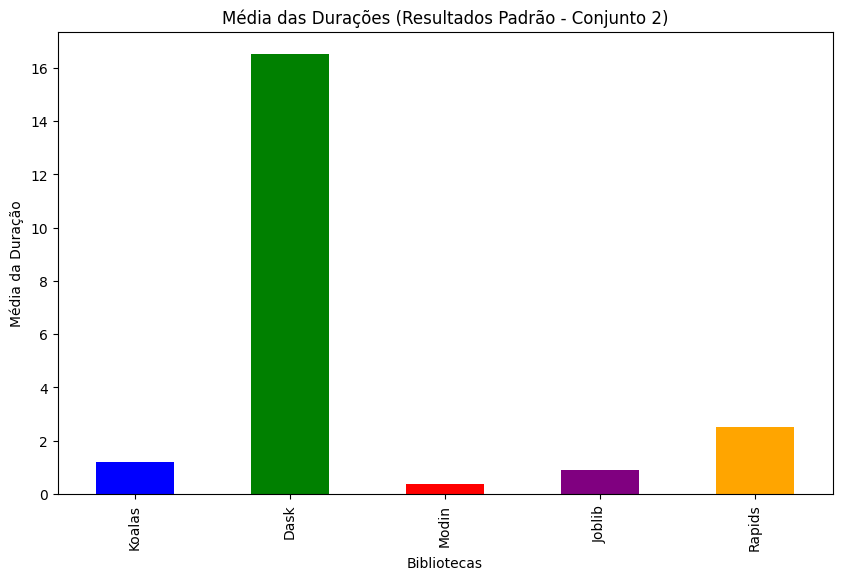

In [102]:
# Média das Durações (Resultados Padrão) - Conjunto 2
mean_durations_standard2 = resultados_standard_concatenado2.mean()
plt.figure(figsize=(10, 6))
mean_durations_standard2.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados Padrão - Conjunto 2)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

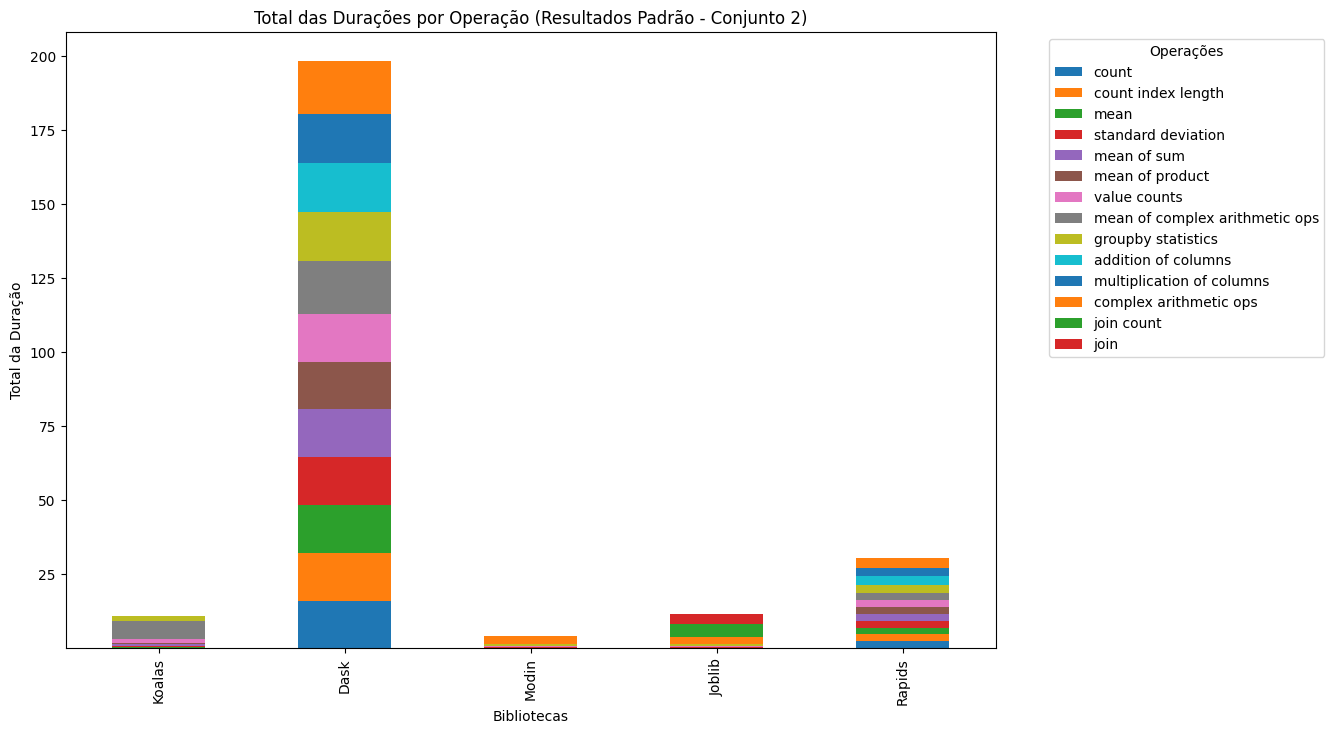

In [103]:
# Gráfico de barras empilhadas para resultados padrão - Conjunto 2
resultados_standard_concatenado2.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados Padrão - Conjunto 2)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Com base na análise dos dados, podemos observar que, em termos gerais, o Modin é a biblioteca que apresenta o melhor desempenho, seguida pelo Joblib, enquanto o Dask se destaca como a biblioteca com o desempenho menos satisfatório. Notavelmente, as operações `complex arithmetic ops` no Modin e `mean of complex arithmetic ops` no Koalas se destacam pelo tempo de execução mais significativo em comparação com outras operações dentro de suas respectivas bibliotecas.

#### Dados Filtrados

In [104]:
# Concatenando os resultados filtrados para as cinco bibliotecas (conjunto 2)
resultados_filtered_concatenado2 = pd.concat([
    koalas_filtered2['duration'], dask_filtered2['duration'], modin_filtered2['duration'], joblib_filtered2['duration'], rapids_filtered2['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados filtrados (conjunto 2)
print("Número de linhas:", resultados_filtered_concatenado2.shape[0])
print("Resultados em Dados Filtrados (Conjunto 2):")
resultados_filtered_concatenado2

Número de linhas: 14
Resultados em Dados Filtrados (Conjunto 2):


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
count,0.059062,16.065588,0.000016,0.000006,2.499300
count index length,0.052356,16.400596,0.000003,0.000003,2.423107
mean,0.269238,16.244606,0.007982,0.008326,2.631595
standard deviation,0.333123,16.677885,0.024984,0.023907,2.556513
mean of sum,0.396748,16.552488,0.012900,0.012807,2.522065
mean of product,0.393968,16.522034,0.012991,0.012797,2.287519
value counts,1.113561,16.808640,0.040241,0.042371,4.333574
mean of complex arithmetic ops,6.367603,16.662311,NaN,NaN,2.535004
groupby statistics,1.450199,16.810044,0.154494,0.152076,3.028732


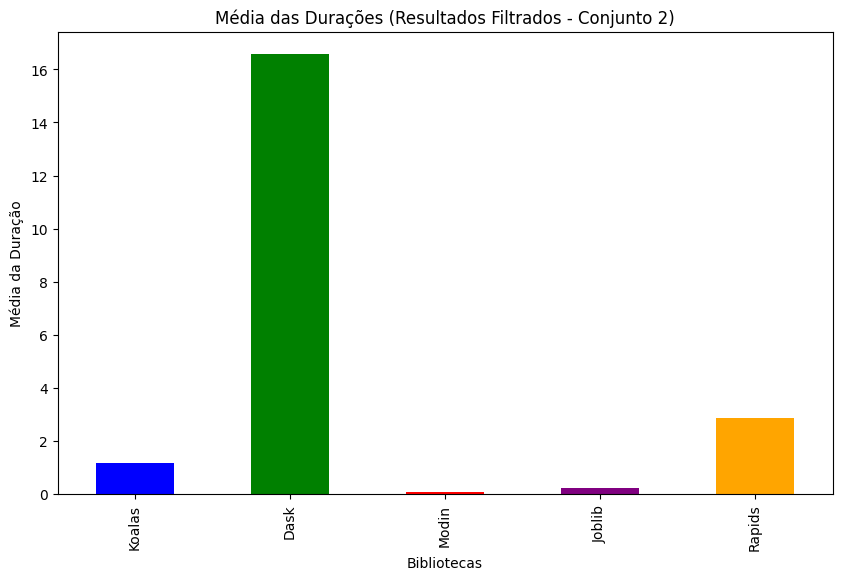

In [105]:
# Média das Durações (Resultados Filtrados) - Conjunto 2
mean_durations_filtered2 = resultados_filtered_concatenado2.mean()
plt.figure(figsize=(10, 6))
mean_durations_filtered2.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados Filtrados - Conjunto 2)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

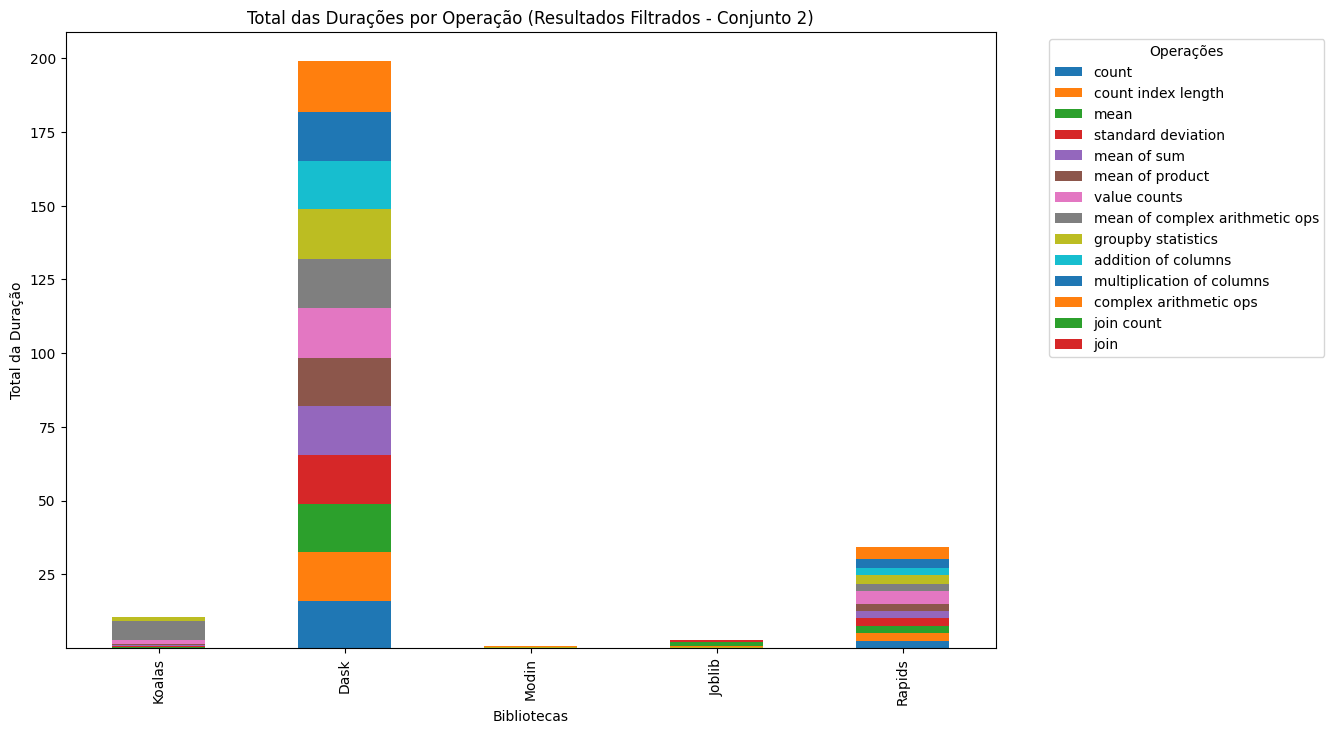

In [106]:
# Gráfico de barras empilhadas para resultados filtrados - Conjunto 2
resultados_filtered_concatenado2.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados Filtrados - Conjunto 2)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Analisando os dados filtrados do conjunto 2, observa-se que o Modin seguido pelo Joblib apresentam os menores tempos de execução, enquanto o Dask é identificado como a biblioteca com o maior tempo de execução. Notavelmente, a operação `mean of complex arithmetic ops` no Koalas destaca-se pelo seu tempo de execução significativamente mais alto em comparação com outras operações dentro da mesma biblioteca.

#### Dados Filtrados com Cache

In [107]:
# Concatenando os resultados em cache para as cinco bibliotecas (conjunto 2)
resultados_cache_concatenado2 = pd.concat([
    dask_cache2['duration'], modin_cache2['duration'], joblib_cache2['duration'], rapids_cache2['duration']
], axis=1, keys=['Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados em cache (conjunto 2)
print("Número de linhas:", resultados_cache_concatenado2.shape[0])
print("Resultados em Dados Filtrados com Cache (Conjunto 2):")
resultados_cache_concatenado2

Número de linhas: 14
Resultados em Dados Filtrados com Cache (Conjunto 2):


,Dask,Modin,Joblib,Rapids
task,,,,
count,0.017897,0.294142,0.000007,0.035059
count index length,0.021131,0.032958,0.000003,0.030143
mean,0.040782,0.002823,0.008056,0.065241
standard deviation,0.049513,0.003131,0.028883,0.073062
mean of sum,0.050729,0.002856,0.016186,0.070235
addition of columns,0.200158,0.001951,0.013173,0.199338
mean of product,0.041922,0.002714,0.015823,0.083183
multiplication of columns,0.202355,0.001635,0.013348,0.212513
mean of complex arithmetic ops,0.303504,NaN,NaN,0.284203


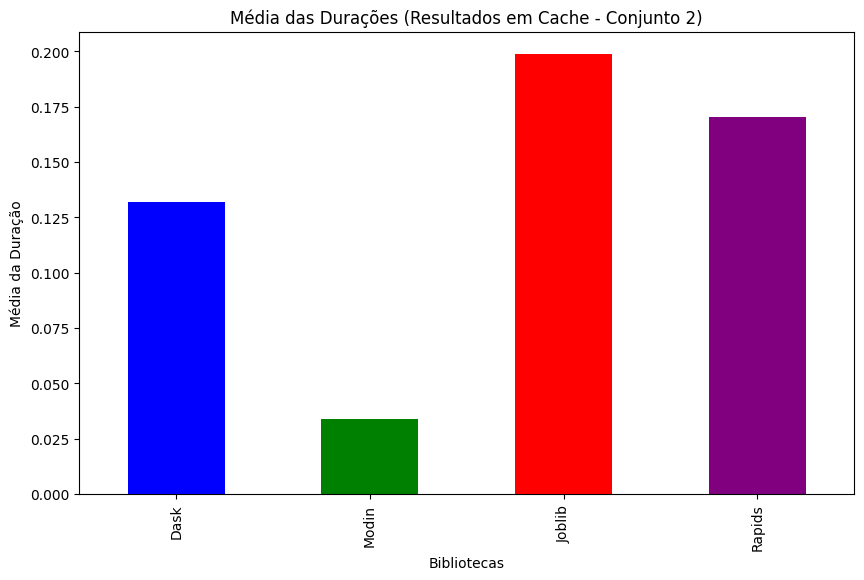

In [108]:
# Média das Durações (Resultados em Cache) - Conjunto 2
mean_durations_cache2 = resultados_cache_concatenado2.mean()
plt.figure(figsize=(10, 6))
mean_durations_cache2.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados em Cache - Conjunto 2)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

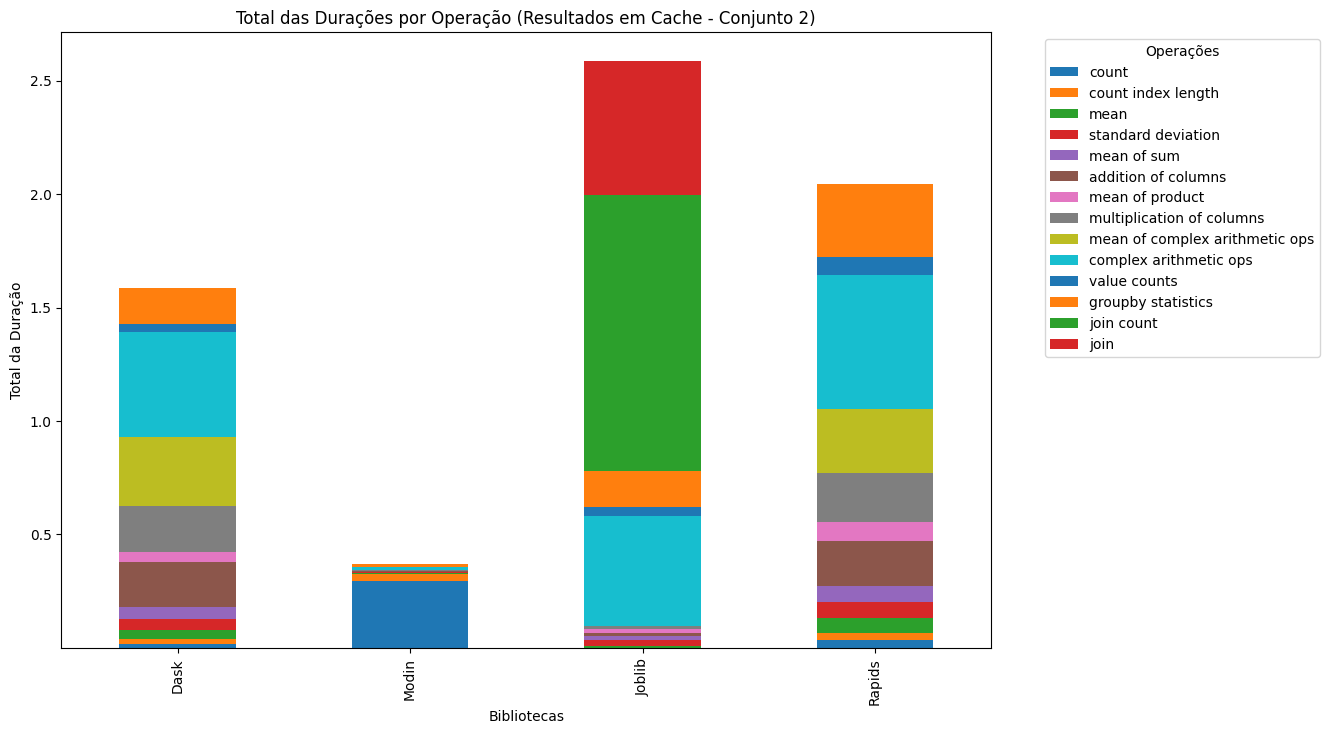

In [109]:
# Gráfico de barras empilhadas para resultados em cache - Conjunto 2
resultados_cache_concatenado2.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados em Cache - Conjunto 2)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Ao analisar os dados com cache, o Modin apresenta o menor tempo de execução, sendo o Joblib com o maior tempo. Notavelmente, a operação `count` no Modin e a operação `join count` no Joblib se destacam pelo tempo de execução mais longo dentro de suas respectivas bibliotecas.

### 3 Ficheiros

#### Dados Completos

In [110]:
# Concatenando os resultados padrão para as cinco bibliotecas (conjunto 3)
resultados_standard_concatenado3 = pd.concat([
    koalas_standard3['duration'], dask_standard3['duration'], modin_standard3['duration'], joblib_standard3['duration'], rapids_standard3['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados padrão (conjunto 3)
print("Número de linhas:", resultados_standard_concatenado3.shape[0])
print("Resultados em Dados Completos (Conjunto 3):")
resultados_standard_concatenado3

Número de linhas: 14
Resultados em Dados Completos (Conjunto 3):


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
count,0.084085,17.269861,0.000006,0.000015,3.725190
count index length,0.053652,17.446398,0.000002,0.000002,3.487336
mean,0.282358,17.639087,0.065263,0.067532,3.390609
standard deviation,0.362486,17.028288,0.221079,0.228248,3.607480
mean of sum,0.434980,17.114664,0.120368,0.121107,3.481357
mean of product,0.523413,17.099322,0.125106,0.126744,4.049202
value counts,1.361079,17.471002,0.325588,0.315891,3.160328
groupby statistics,1.381243,17.712915,1.183720,1.203007,4.005501
addition of columns,NaN,17.814334,0.099792,0.103520,5.379433


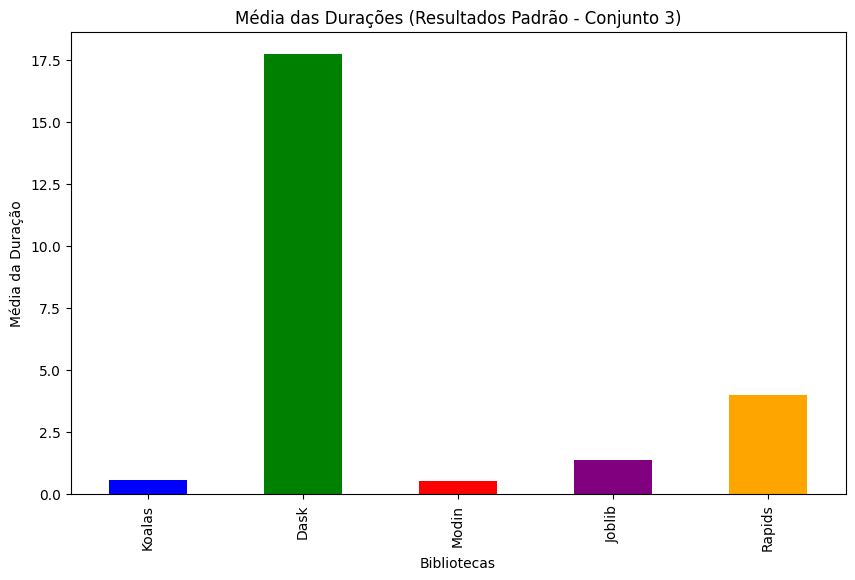

In [111]:
# Média das Durações (Resultados Padrão) - Conjunto 3
mean_durations_standard3 = resultados_standard_concatenado3.mean()
plt.figure(figsize=(10, 6))
mean_durations_standard3.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados Padrão - Conjunto 3)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

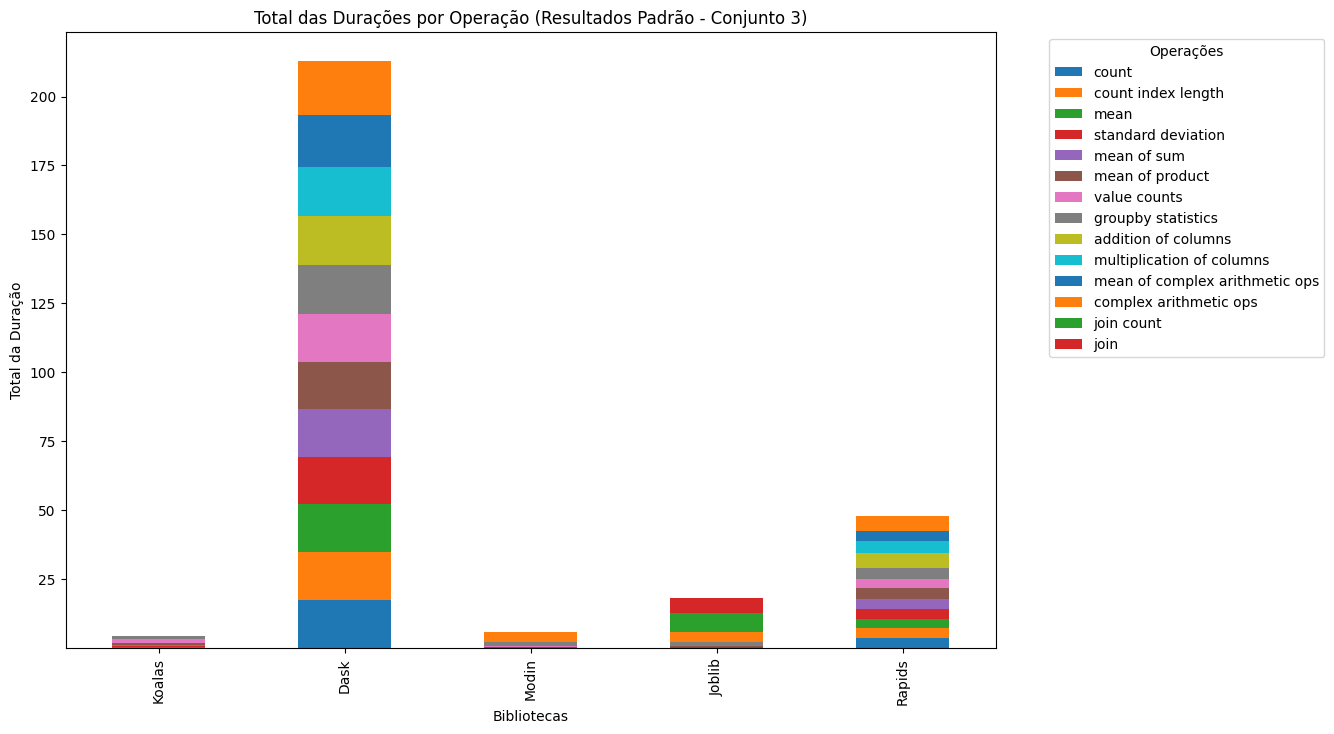

In [112]:
# Gráfico de barras empilhadas para resultados padrão - Conjunto 3
resultados_standard_concatenado3.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados Padrão - Conjunto 3)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações:**

Analisando os dados completos do conjunto com 3 ficheiros, observa-se que o Modin e o Koalas são as bibliotecas com os tempos de execução mais rápidos, com tempos muito semelhantes, seguidos pelo Joblib, sendo o Dask identificado como a biblioteca com o desempenho mais lento. Destaca-se que a operação `complex arithmetic ops` no Modin é a que apresenta o maior tempo de execução entre todas as operações dentro desta biblioteca.

#### Dados Filtrados

In [113]:
# Concatenando os resultados filtrados para as cinco bibliotecas (conjunto 3)
resultados_filtered_concatenado3 = pd.concat([
    koalas_filtered3['duration'], dask_filtered3['duration'], modin_filtered3['duration'], joblib_filtered3['duration'], rapids_filtered3['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados filtrados (conjunto 3)
print("Número de linhas:", resultados_filtered_concatenado3.shape[0])
print("Resultados em Dados Filtrados (Conjunto 3):")
resultados_filtered_concatenado3

Número de linhas: 14
Resultados em Dados Filtrados (Conjunto 3):


,Koalas,Dask,Modin,Joblib,Rapids
task,,,,,
count,0.068141,17.462104,0.000005,0.000006,3.409777
count index length,0.055578,17.478204,0.000002,0.000003,3.430728
mean,0.288670,17.902372,0.011838,0.012823,3.510671
standard deviation,0.364278,18.225916,0.038018,0.045010,3.755699
mean of sum,0.419480,18.008095,0.018801,0.024679,3.793947
mean of product,0.535474,17.764452,0.020265,0.024279,3.417218
value counts,1.184319,17.507014,0.061983,0.064083,3.383961
groupby statistics,1.431895,17.890965,0.235430,0.239844,3.454116
addition of columns,NaN,17.893165,0.015079,0.020460,3.520633


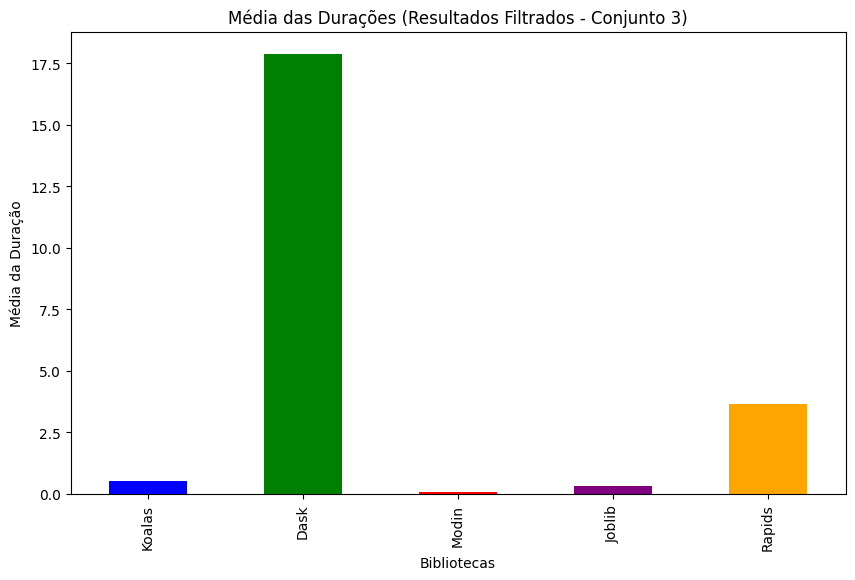

In [114]:
# Média das Durações (Resultados Filtrados) - Conjunto 3
mean_durations_filtered3 = resultados_filtered_concatenado3.mean()
plt.figure(figsize=(10, 6))
mean_durations_filtered3.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados Filtrados - Conjunto 3)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

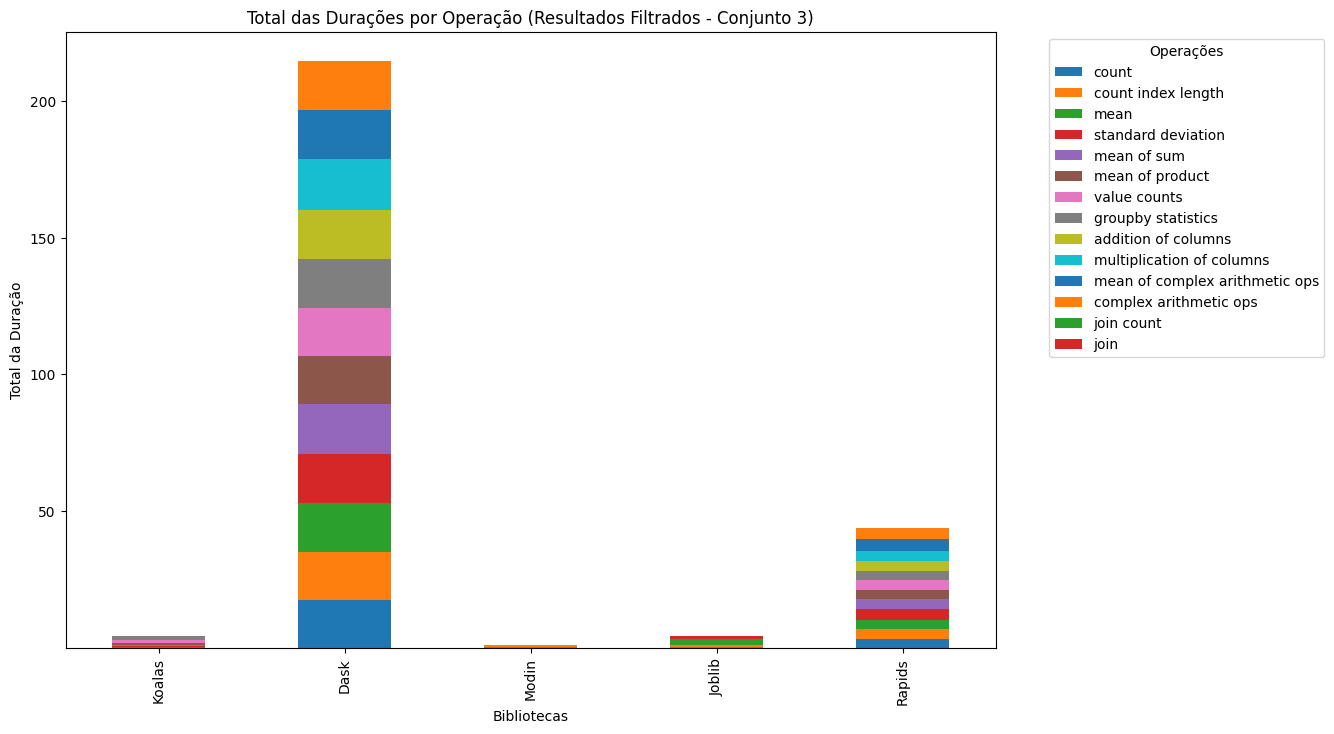

In [115]:
# Gráfico de barras empilhadas para resultados filtrados - Conjunto 3
resultados_filtered_concatenado3.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados Filtrados - Conjunto 3)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações**:

Na análise dos dados filtrados do conjunto com 3 ficheiros, observa-se que o Modin é a biblioteca com o tempo de execução mais rápido, seguida pelo Joblib, enquanto o Dask é identificado como a biblioteca com o desempenho mais lento. Notavelmente, em termos das operações, não são observadas grandes discrepâncias entre as bibliotecas em relação aos tempos de execução.

#### Dados Filtados com Cache

In [116]:
# Concatenando os resultados em cache para as cinco bibliotecas (conjunto 3)
resultados_cache_concatenado3 = pd.concat([
    dask_cache3['duration'], modin_cache3['duration'], joblib_cache3['duration']
], axis=1, keys=['Dask', 'Modin', 'Joblib', 'Rapids'])

# Visualizar os DataFrames concatenados de resultados em cache (conjunto 3)
print("Número de linhas:", resultados_cache_concatenado3.shape[0])
print("Resultados em Dados Filtrados com Cache (Conjunto 3):")
resultados_cache_concatenado3

Número de linhas: 14
Resultados em Dados Filtrados com Cache (Conjunto 3):


,Dask,Modin,Joblib
task,,,
count,0.017228,0.033976,0.000006
count index length,0.021042,0.024854,0.000003
mean,0.045588,0.002636,0.012968
standard deviation,0.062161,0.003128,0.045954
mean of sum,0.044308,0.002911,0.024913
addition of columns,0.288703,0.001766,0.020624
mean of product,0.046240,0.002810,0.024718
multiplication of columns,0.247524,0.001678,0.020066
mean of complex arithmetic ops,0.334195,NaN,NaN


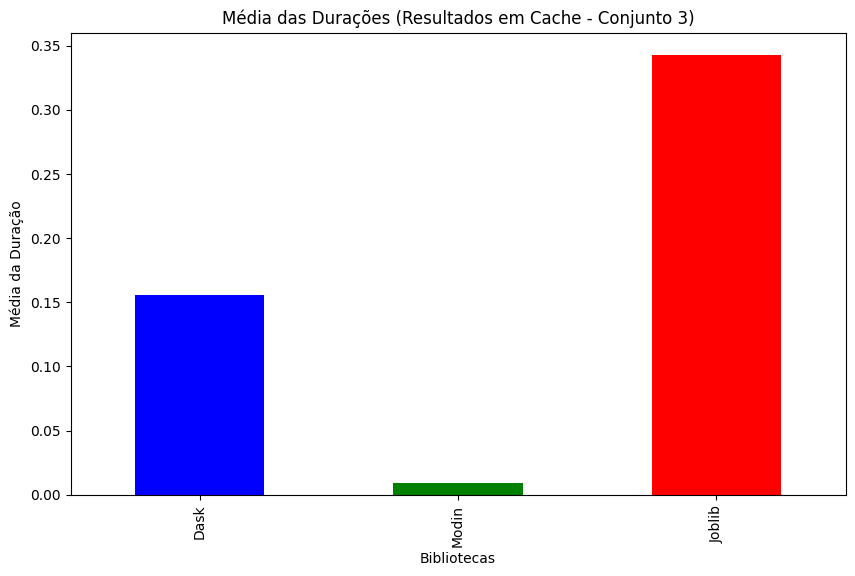

In [117]:
# Média das Durações (Resultados em Cache) - Conjunto 3
mean_durations_cache3 = resultados_cache_concatenado3.mean()
plt.figure(figsize=(10, 6))
mean_durations_cache3.plot(kind='bar', color=colors)
plt.title('Média das Durações (Resultados em Cache - Conjunto 3)')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

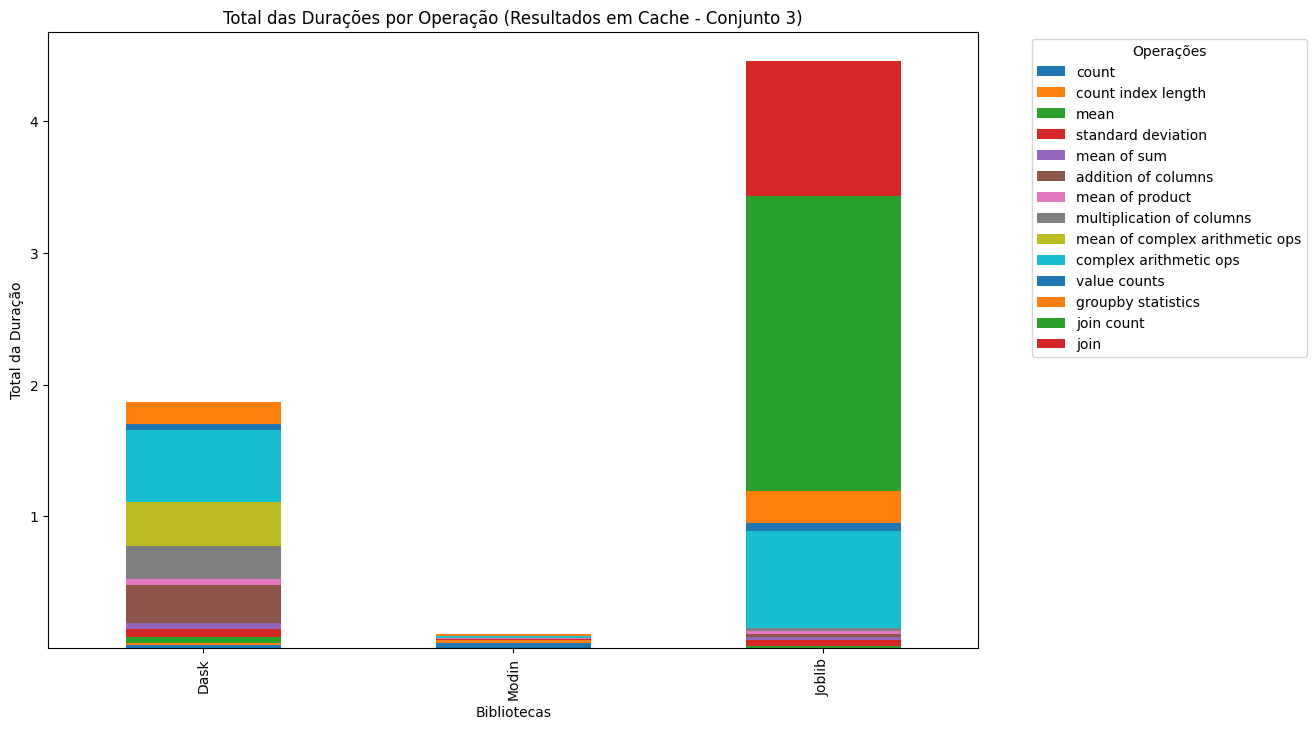

In [118]:
# Gráfico de barras empilhadas para resultados em cache - Conjunto 3
resultados_cache_concatenado3.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação (Resultados em Cache - Conjunto 3)')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observações**:

Analisando os dados com cache do conjunto com 3 ficheiros, destaca-se que o Modin como a biblioteca com o tempo de execução mais rápido, com uma diferença significativa em relação às outras bibliotecas, enquanto o Joblib é identificado como o mais lento. É importante notar que a operação "join count" no Joblib se destaca pelo maior tempo de execução em comparação com outras operações dentro desta biblioteca.

## Tempo de execução médio por operação

Realizou-se um gráfico de barras agrupado para comparar o tempo médio de execução por operação e modo de processamento. Os dados foram divididos em três conjuntos: dados completos, dados filtrados e dados filtrados com cache. O eixo x mostra as operações realizadas, enquanto o eixo y representa o tempo médio de execução.

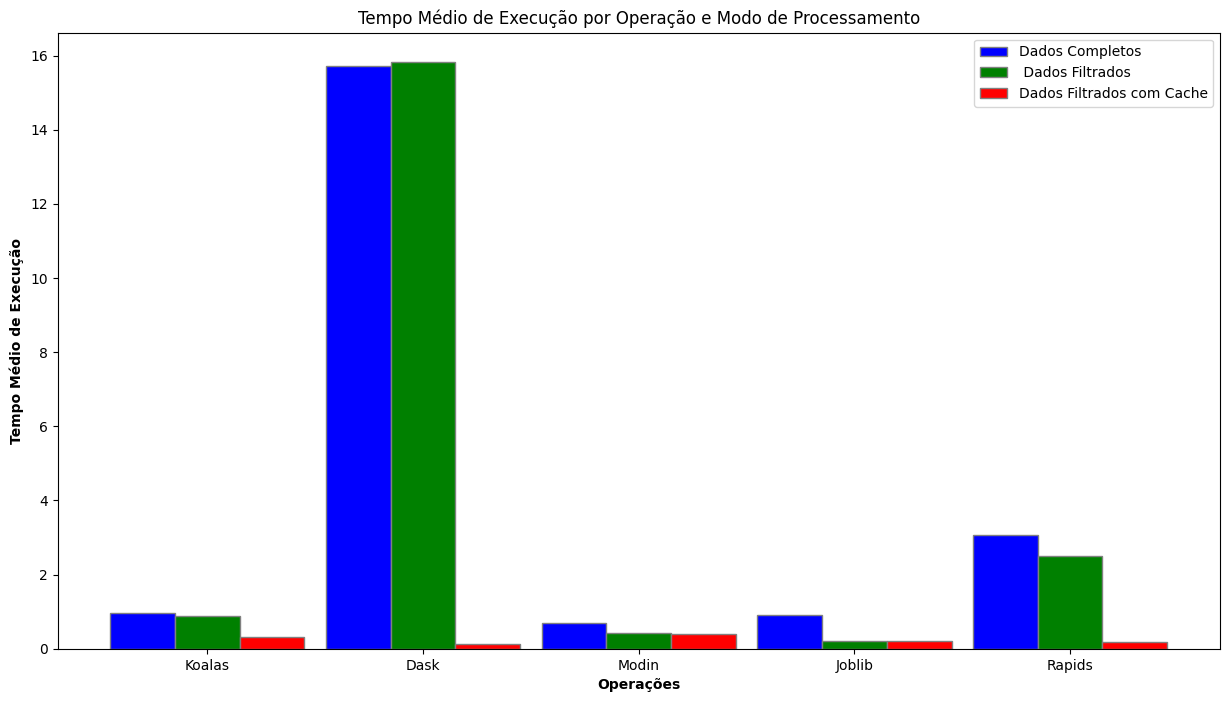

In [119]:
# Concatenando todos os resultados padrão, filtrados e em cache para todas as bibliotecas e número de ficheiros
all_results_standard = pd.concat([resultados_standard_concatenado, resultados_standard_concatenado2, resultados_standard_concatenado3])
all_results_filtered = pd.concat([resultados_filtered_concatenado, resultados_filtered_concatenado2, resultados_filtered_concatenado3])
all_results_cache = pd.concat([resultados_cache_concatenado, resultados_cache_concatenado2, resultados_cache_concatenado3])

# Calculando a média do tempo de execução por operação para cada conjunto de resultados
mean_durations_standard = all_results_standard.mean()
mean_durations_filtered = all_results_filtered.mean()
mean_durations_cache = all_results_cache.mean()

# Configuração das cores para cada conjunto de dados
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Configuração das operações
operations = mean_durations_standard.index

# Configuração da largura das barras
bar_width = 0.3

# Posições das barras para cada operação
r1 = np.arange(len(operations))

# Criando o gráfico de barras agrupado
plt.figure(figsize=(15, 8))

# Adicionando barras para os dados completos
plt.bar(r1, mean_durations_standard, color=colors[0], width=bar_width, edgecolor='grey', label='Dados Completos')
plt.bar(r1 + bar_width, mean_durations_filtered, color=colors[1], width=bar_width, edgecolor='grey', label=' Dados Filtrados')
plt.bar(r1 + 2*bar_width, mean_durations_cache, color=colors[2], width=bar_width, edgecolor='grey', label='Dados Filtrados com Cache')

# Adicionando legendas e rótulos aos eixos
plt.xlabel('Operações', fontweight='bold')
plt.ylabel('Tempo Médio de Execução', fontweight='bold')
plt.title('Tempo Médio de Execução por Operação e Modo de Processamento')
plt.xticks([r + bar_width for r in range(len(operations))], operations)
plt.legend()

# Exibindo o gráfico
plt.show()


**Observações:**

- O Dask com cache apresenta o tempo mais rápido de execução em comparação com os outros modos de processamento. No entanto, sem cache, o Dask é o que demora mais, indicando uma significativa melhoria quando a cache é utilizada.
- De forma geral, filtrar os dados resulta numa melhoria no tempo de execução para todas as bibliotecas. Além disso, filtrar os dados com cache resulta sempre no tempo mais rápido de execução.
- No entanto, é importante destacar que houve limitações de memória ao tentar usar cache com o Koalas nos conjuntos de dados 2 e 3, o que impossibilitou a comparação nesses casos.
- Em termos gerais, a biblioteca que demonstra melhor desempenho em todos os cenários (dados completos, filtrados e com cache) é o Modin, seguido pelo Joblib. Ambos apresentam consistência em suas performances, sendo o Modin ligeiramente superior.

## Impacto do tamanho do dataset no tempo de execução

Elaboraram-se três gráficos para analisar o impacto do tamanho do dataset no tempo de execução, considerando dados completos, filtrados e filtrados com cache. Cada gráfico representa o tempo médio de execução para diferentes bibliotecas em relação ao número de arquivos no dataset.

In [120]:
# Remover a linha "read file" de cada DataFrame correspondente aos conjuntos de dados com 1 arquivo
koalas_standard1 = koalas_standard1.drop(index='read file')
dask_standard1 = dask_standard1.drop(index='read file')
modin_standard1 = modin_standard1.drop(index='read file')
rapids_standard1 = rapids_standard1.drop(index='read file')

### Dados Completos

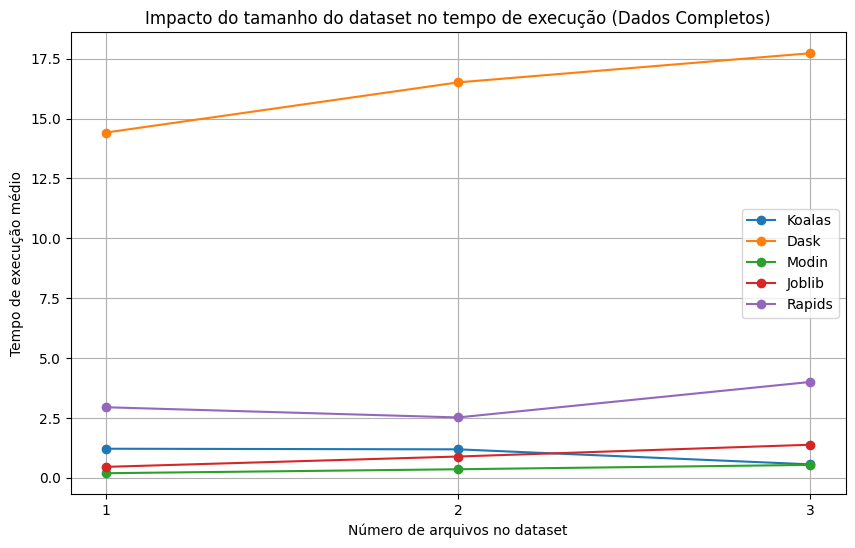

In [121]:
import matplotlib.pyplot as plt

# Extrair os tempos de execução das operações padrão, filtradas e em cache para cada dataset em cada biblioteca
standard_times = {
    'Koalas': [koalas_standard1['duration'].mean(), koalas_standard2['duration'].mean(), koalas_standard3['duration'].mean()],
    'Dask': [dask_standard1['duration'].mean(), dask_standard2['duration'].mean(), dask_standard3['duration'].mean()],
    'Modin': [modin_standard1['duration'].mean(), modin_standard2['duration'].mean(), modin_standard3['duration'].mean()],
    'Joblib': [joblib_standard1['duration'].mean(), joblib_standard2['duration'].mean(), joblib_standard3['duration'].mean()],
    'Rapids': [rapids_standard1['duration'].mean(), rapids_standard2['duration'].mean(), rapids_standard3['duration'].mean()]
}

# Definir os tamanhos dos datasets
datasets = [1, 2, 3]

# Plotar os tempos médios de execução para cada tipo de operação e biblioteca
plt.figure(figsize=(10, 6))

for lib in standard_times.keys():
    plt.plot(datasets, standard_times[lib], marker='o', label=lib)

plt.title('Impacto do tamanho do dataset no tempo de execução (Dados Completos)')
plt.xlabel('Número de arquivos no dataset')
plt.ylabel('Tempo de execução médio')
plt.xticks(datasets)
plt.legend()
plt.grid(True)
plt.show()

Nas observações do gráfico, é notável que o Rapids apresentou uma melhoria no tempo de execução ao passar de um dataset com 1 arquivo para um com 2 arquivos, no entanto, houve uma piora significativa quando o número de arquivos aumentou para 3. Por outro lado, o Koalas teve uma melhoria no tempo de execução ao passar de um dataset com 2 arquivos para um com 3, apesar de ter piorado no dataset com 2 arquivos.

### Dados Filtrados

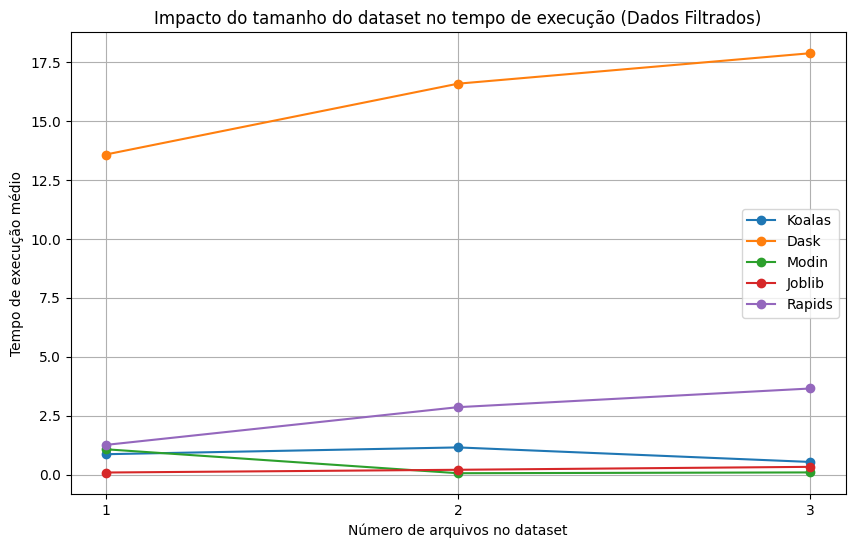

In [122]:
filtered_times = {
    'Koalas': [koalas_filtered1['duration'].mean(), koalas_filtered2['duration'].mean(), koalas_filtered3['duration'].mean()],
    'Dask': [dask_filtered1['duration'].mean(), dask_filtered2['duration'].mean(), dask_filtered3['duration'].mean()],
    'Modin': [modin_filtered1['duration'].mean(), modin_filtered2['duration'].mean(), modin_filtered3['duration'].mean()],
    'Joblib': [joblib_filtered1['duration'].mean(), joblib_filtered2['duration'].mean(), joblib_filtered3['duration'].mean()],
    'Rapids': [rapids_filtered1['duration'].mean(), rapids_filtered2['duration'].mean(), rapids_filtered3['duration'].mean()]
}

plt.figure(figsize=(10, 6))

for lib in filtered_times.keys():
    plt.plot(datasets, filtered_times[lib], marker='o', label=lib)

plt.title('Impacto do tamanho do dataset no tempo de execução (Dados Filtrados)')
plt.xlabel('Número de arquivos no dataset')
plt.ylabel('Tempo de execução médio')
plt.xticks(datasets)
plt.legend()
plt.grid(True)
plt.show()

Nas observações dos gráficos para os dados filtrados, destaca-se que o Modin apresentou uma melhoria no tempo de execução ao passar do dataset com 1 arquivo para o dataset com 2 arquivos e manteve o desempenho semelhante ao do dataset com 2 arquivos no dataset com 3 arquivos. Por outro lado, todas as outras bibliotecas mostraram um aumento no tempo de execução à medida que o tamanho do dataset aumentou.

### Dados Filtrados com cache

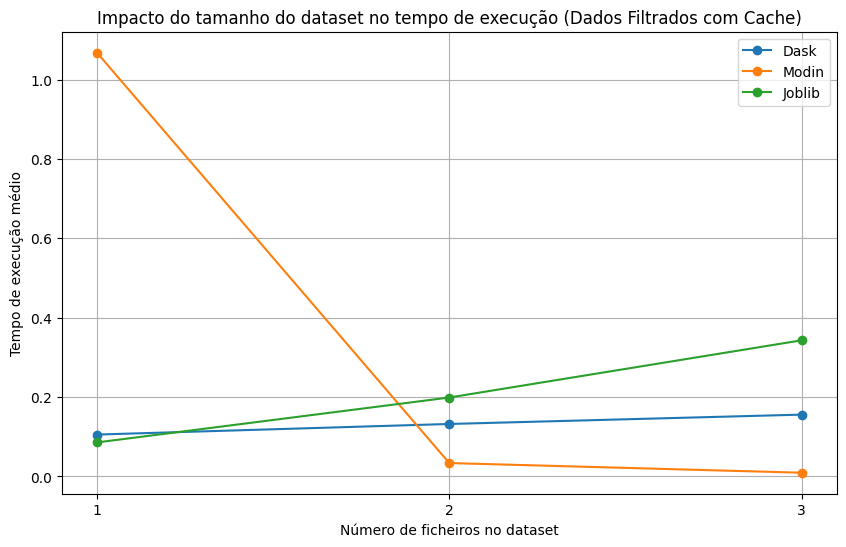

In [123]:
cache_times = {
    'Dask': [dask_cache1['duration'].mean(), dask_cache2['duration'].mean(), dask_cache3['duration'].mean()],
    'Modin': [modin_cache1['duration'].mean(), modin_cache2['duration'].mean(), modin_cache3['duration'].mean()],
    'Joblib': [joblib_cache1['duration'].mean(), joblib_cache2['duration'].mean(), joblib_cache3['duration'].mean()],
}

plt.figure(figsize=(10, 6))

for lib in cache_times.keys():
    plt.plot(datasets, cache_times[lib], marker='o', label=lib)

plt.title('Impacto do tamanho do dataset no tempo de execução (Dados Filtrados com Cache)')
plt.xlabel('Número de ficheiros no dataset')
plt.ylabel('Tempo de execução médio')
plt.xticks(datasets)
plt.legend()
plt.grid(True)
plt.show()

Nas observações dos gráficos para os dados filtrados com cache, destaca-se uma melhoria significativa no desempenho do Modin, especialmente ao comparar o dataset com 2 arquivos ao dataset com 3 arquivos. Essa melhoria progressiva sugere que o Modin pode estar a beneficiar de otimizações ou estratégias de processamento paralelo que se tornam mais eficazes com conjuntos de dados maiores. Enquanto isso, as outras bibliotecas mostraram um aumento contínuo no tempo de execução à medida que o tamanho do dataset aumentou, indicando que podem não estar aproveitar totalmente os recursos de cache.

## Conclusões Finais

Após uma análise detalhada dos resultados obtidos nos três notebooks e dos gráficos gerados, é possível realizar algumas considerações finais sobre o desempenho das bibliotecas em cenários de processamento de dados em larga escala.

O Modin destacou-se como uma escolha consistente e eficiente, apresentando tempos de execução competitivos numa variedade de cenários. A sua capacidade de lidar com conjuntos de dados de diferentes tamanhos e tipos, juntamente com melhorias progressivas em cenários de cache, torna-o uma opção atraente para projetos que exigem alto desempenho e escalabilidade.

O Joblib também demonstrou um desempenho notável, mostrando-se uma alternativa confiável, especialmente em operações que envolvem processamento paralelo. A sua flexibilidade e capacidade de integrar-se facilmente a pipelines de processamento de dados tornam-no numa escolha popular entre os profissionais de ciência de dados.

Por outro lado, o Dask, embora tenha apresentado tempos de execução mais lentos em média, mostrou uma menor variabilidade nos resultados, o que pode ser uma vantagem em certos contextos onde a previsibilidade é fundamental. No entanto, a sua escalabilidade limitada em certas operações pode representar um desafio em cenários de processamento extremamente intensivos.

Quanto ao Rapids, observa-se que a sua performance foi bastante competitiva, com tempos de execução consistentemente baixos e menor variabilidade, indicando um desempenho rápido e confiável. No entanto, houve variações no desempenho conforme o tamanho do dataset aumentou, sugerindo uma sensibilidade a fatores como a complexidade da operação e o volume de dados processados.

O Koalas, por sua vez, mostrou um desempenho sólido em muitos cenários, especialmente em operações simples e operações de agregação. No entanto, a sua capacidade de lidar com datasets maiores pode ser limitada, como evidenciado pela dificuldade em usar cache em conjuntos de dados maiores devido a restrições de memória.

A análise também destacou o impacto significativo do tamanho do dataset no desempenho das bibliotecas. Enquanto algumas bibliotecas, como o Modin, se beneficiaram do aumento do tamanho do dataset, outras mostraram variações no desempenho, com melhorias ou piorias dependendo do cenário específico.

Além disso, o uso de cache e a filtragem de dados foram identificados como estratégias eficazes para melhorar o desempenho em todas as bibliotecas. A capacidade de armazenar resultados intermediários e reduzir a quantidade de dados processados contribuiu para tempos de execução mais rápidos e uma maior consistência nos resultados.

Em resumo, a escolha da biblioteca ideal depende de uma variedade de fatores, incluindo as características específicas do conjunto de dados, os requisitos de desempenho e as preferências do usuário. No entanto, a análise abrangente realizada nos notebooks fornece uma base sólida para orientar essa decisão, fornecendo insights valiosos sobre o desempenho relativo das diferentes bibliotecas numa variedade de cenários de processamento de dados em larga escala.